In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Selection

In [2]:

# Load dataset (assuming dataset.csv is in the zip)
df = pd.read_csv('ml-with-python-course-project/train.csv')

In [3]:
print("First 5 rows of the dataset:\n", df.head(5))

First 5 rows of the dataset:
    sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [62]:
df.shape

(215, 15)

## EDA and Data Preprocessing

<Axes: title={'center': 'Gender Distribution'}, xlabel='Gender', ylabel='Count'>

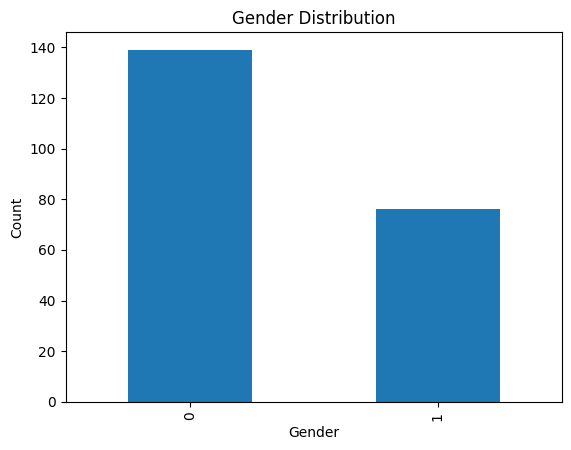

In [5]:
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar', title='Gender Distribution', xlabel='Gender', ylabel='Count')


<Axes: title={'center': 'Placement Rate by Specialization'}, xlabel='specialisation'>

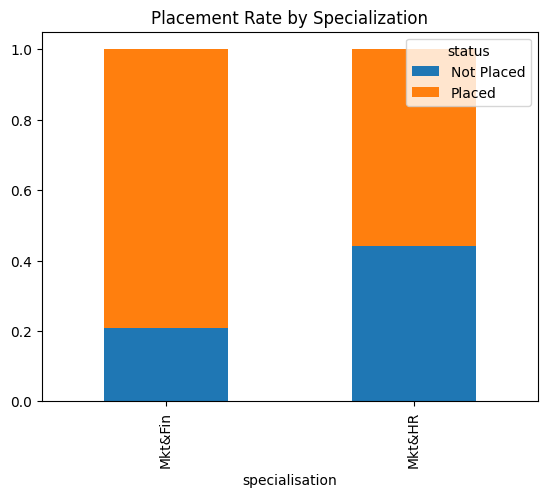

In [6]:
placement_rate = df.groupby('specialisation')['status'].value_counts(normalize=True).unstack()
placement_rate.plot(kind='bar', stacked=True, title='Placement Rate by Specialization')


<Axes: title={'center': 'Salary Distribution'}, xlabel='Salary', ylabel='Frequency'>

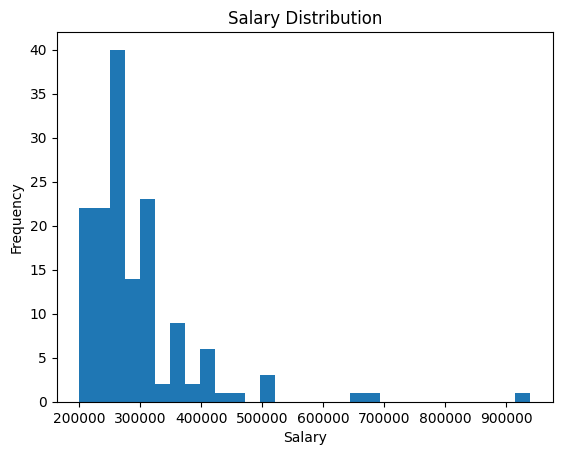

In [7]:
df['salary'].plot(kind='hist', bins=30, title='Salary Distribution', xlabel='Salary', ylabel='Frequency')


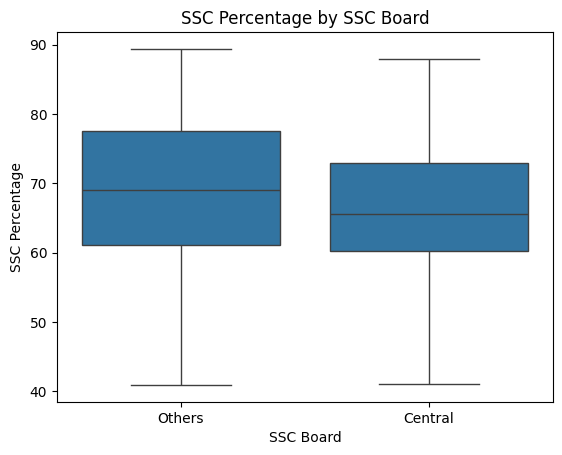

In [8]:
sns.boxplot(x='ssc_b', y='ssc_p', data=df)
plt.title('SSC Percentage by SSC Board')
plt.ylabel('SSC Percentage')
plt.xlabel('SSC Board')
plt.show()

<Axes: title={'center': 'Average Salary by Work Experience'}, xlabel='workex'>

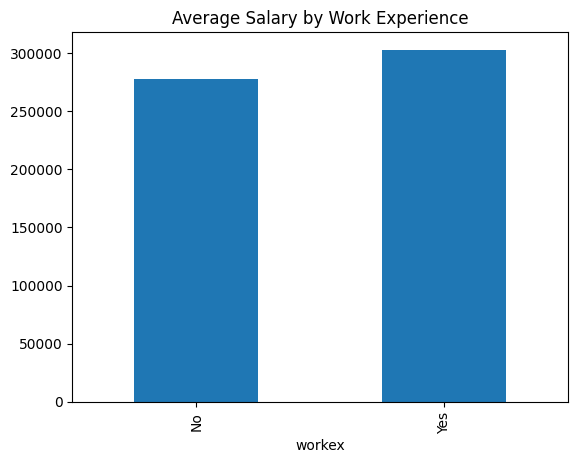

In [9]:
avg_salary_workex = df.groupby('workex')['salary'].mean()
avg_salary_workex.plot(kind='bar', title='Average Salary by Work Experience')


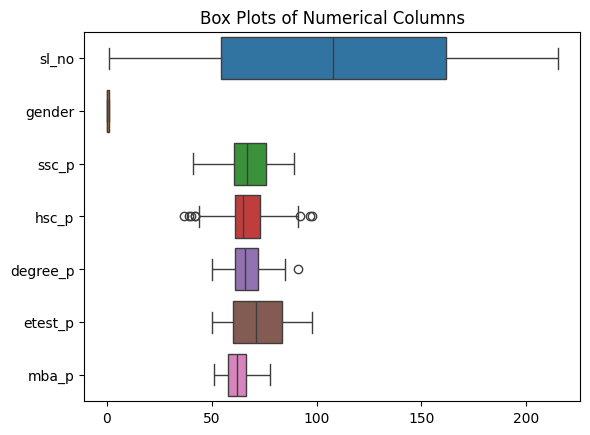

In [10]:
sns.boxplot(data=df.select_dtypes(include=['number']).drop(columns='salary'), orient='h'); plt.title('Box Plots of Numerical Columns'); plt.show()


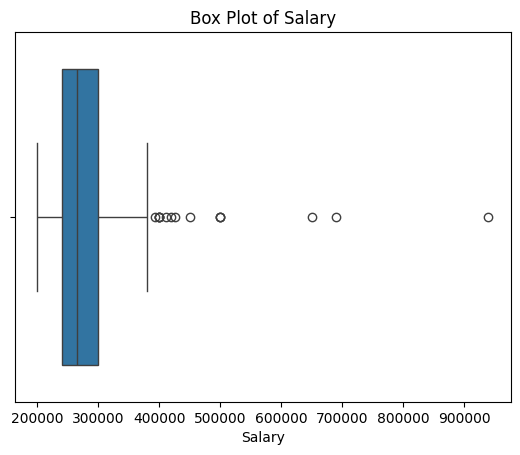

In [11]:
sns.boxplot(x=df['salary']); plt.title('Box Plot of Salary'); plt.xlabel('Salary'); plt.show()


In [12]:
# Basic data exploration
print("Dataset Information:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB
Dataset Information:
 None


## Feature Engineering 

In [15]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values and the count of missing values
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
salary    67
dtype: int64


In [37]:
# Filling Missing Values
imputer = SimpleImputer(strategy='constant', fill_value=0)
# Apply the imputer to the DataFrame and transform it
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the updated DataFrame
print(df_filled)

     sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1.0     0.0  67.00    1.0  91.00    1.0    1.0     58.00       2.0   
1      2.0     0.0  79.33    0.0  78.33    1.0    2.0     77.48       2.0   
2      3.0     0.0  65.00    0.0  68.00    0.0    0.0     64.00       0.0   
3      4.0     0.0  56.00    0.0  52.00    0.0    2.0     52.00       2.0   
4      5.0     0.0  85.80    0.0  73.60    0.0    1.0     73.30       0.0   
..     ...     ...    ...    ...    ...    ...    ...       ...       ...   
210  211.0     0.0  80.60    1.0  82.00    1.0    1.0     77.60       0.0   
211  212.0     0.0  58.00    1.0  60.00    1.0    2.0     72.00       2.0   
212  213.0     0.0  67.00    1.0  67.00    1.0    1.0     73.00       0.0   
213  214.0     1.0  74.00    1.0  66.00    1.0    1.0     58.00       0.0   
214  215.0     0.0  62.00    0.0  58.00    1.0    2.0     53.00       0.0   

     workex  etest_p  specialisation  mba_p  status    salary  
0       0.0

In [38]:
# Encode categorical variables
label_encoders = {}
for col in df_filled.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [39]:
df_filled.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,0.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,1.0,58.80,1.0,270000.0
1,2.0,0.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,0.0,66.28,1.0,200000.0
2,3.0,0.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,0.0,57.80,1.0,250000.0


## Correlation Matrix

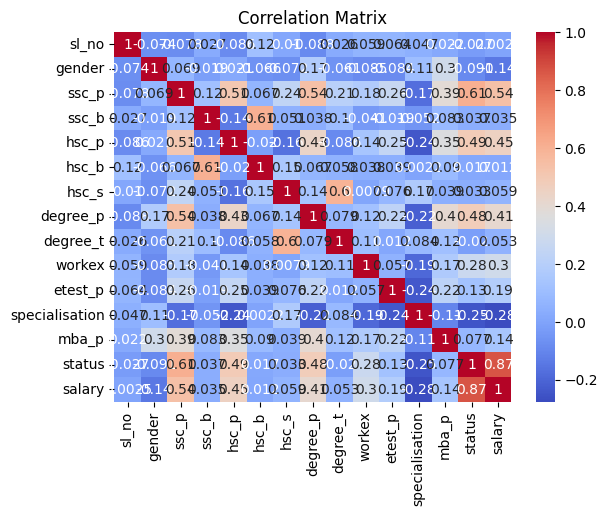

In [40]:
correlation_matrix = df_filled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Splittinag and Standardizing

In [41]:
# Splitting features and target variable
X = df_filled.drop('status', axis=1)
y = df_filled['status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Development and Hyperparameters tuning

In [60]:

# Logistic Regression Model
log_params = {'C': [0.1, 1.0, 10], 'penalty': ['l2']}
log_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_params, cv=5, scoring='accuracy')
log_grid.fit(X_train_filled, y_train)

# Random Forest Model
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_filled, y_train)

# Support Vector Classifier with probability=True
svc_params = {'C': [0.1, 1.0, 10], 'kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(SVC(probability=True), svc_params, cv=5, scoring='accuracy')  # Set probability=True
svc_grid.fit(X_train_filled, y_train)

# Best estimators
best_log_clf = log_grid.best_estimator_
best_rf_clf = rf_grid.best_estimator_
best_svc_clf = svc_grid.best_estimator_

In [43]:
# Model Training

In [44]:

# Training the best models
best_log_clf.fit(X_train_filled, y_train)
best_rf_clf.fit(X_train_filled, y_train)
best_svc_clf.fit(X_train_filled, y_train)

# Training process:
# - Each model is trained on the training data (X_train, y_train).
# - The models have been tuned for optimal hyperparameters via GridSearchCV.

SVC(C=0.1, kernel='linear')

###  Model Evaluation

Logistic Regression Evaluation:
Accuracy: 0.7907
Precision: 0.7798
Recall: 0.7907
F1 Score: 0.7806


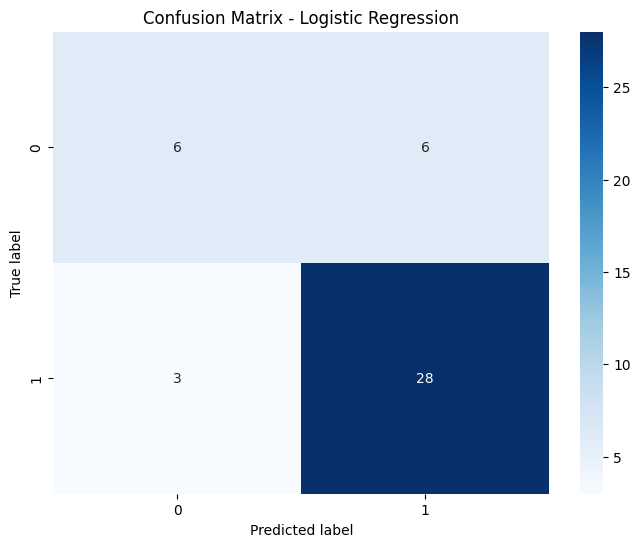

Random Forest Evaluation:
Accuracy: 0.6744
Precision: 0.5099
Recall: 0.6744
F1 Score: 0.5807


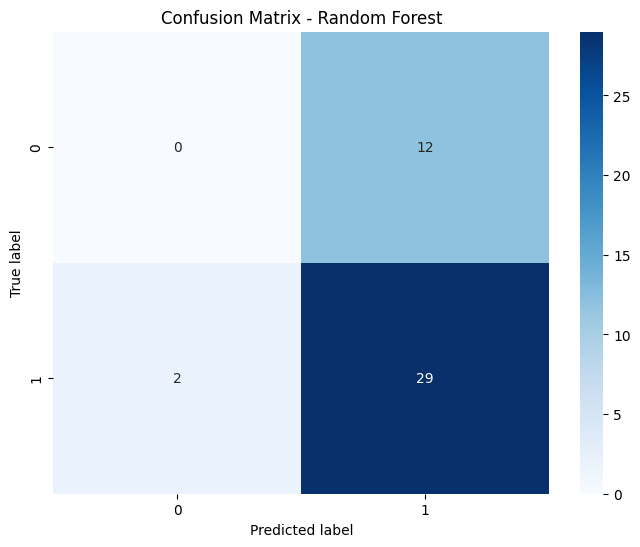

SVC Evaluation:
Accuracy: 0.8837
Precision: 0.8817
Recall: 0.8837
F1 Score: 0.8821


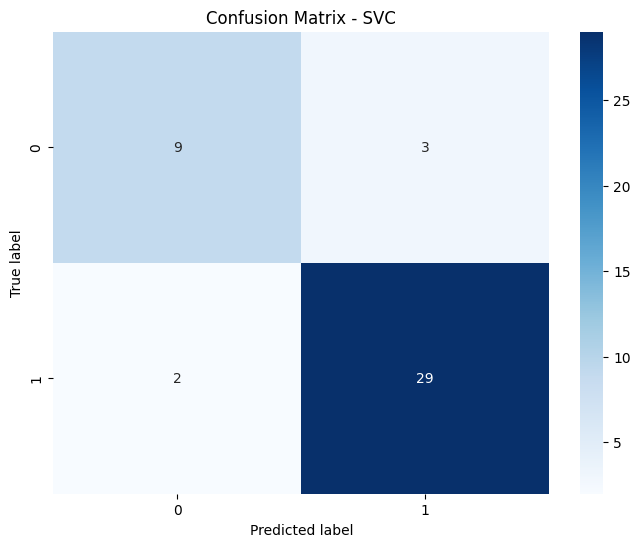

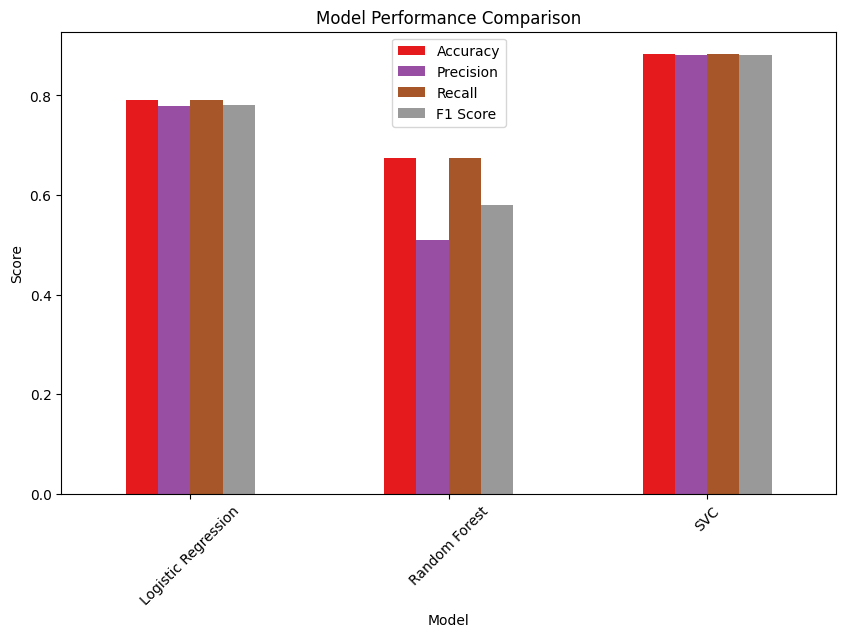

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Extended Function to Evaluate and Visualize Models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation metrics
    print(f'{model_name} Evaluation:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Bar Plot for Metric Comparison Across Models
def compare_models_performance(models, X_test, y_test):
    results = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': [],

    }

    # Loop through models to get their evaluation metrics
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
     
        
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)
 
    # Create a DataFrame for easy plotting
    results_df = pd.DataFrame(results)

    # Plot the comparison as bar charts
    results_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='Set1')
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.show()

# Example of usage:
models = {
    'Logistic Regression': best_log_clf,
    'Random Forest': best_rf_clf,
    'SVC': best_svc_clf
}

# Evaluate each model with additional visualizations
evaluate_model(best_log_clf, X_test, y_test, 'Logistic Regression')
evaluate_model(best_rf_clf, X_test, y_test, 'Random Forest')
evaluate_model(best_svc_clf, X_test, y_test, 'SVC')

# Compare models performance using bar plots
compare_models_performance(models, X_test, y_test)


In [61]:
# Create a Voting Classifier using the best estimators
voting_clf = VotingClassifier(
    estimators=[
        ('logistic', best_log_clf),
        ('random_forest', best_rf_clf),
        ('svc', best_svc_clf)
    ],
    voting='soft'  # Use 'soft' voting to consider predicted probabilities
)

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train_filled, y_train)

# Evaluate the Voting Classifier
y_pred_voting = voting_clf.predict(X_test_filled)  # Ensure you have a filled test set

# Calculate evaluation metrics for the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

# Print the evaluation results
print(f"\nVoting Classifier - Accuracy: {accuracy_voting:.4f}, Precision: {precision_voting:.4f}, F1 Score: {f1_voting:.4f}")


Voting Classifier - Accuracy: 0.8837, Precision: 0.8817, F1 Score: 0.8821
